In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\apps.csv")
df

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
df.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [13]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
# Drop the unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# Clean the 'Installs' column
df['Installs'] = df['Installs'].str.replace(",", "").str.replace("+", "").astype(int)

In [21]:
# Clean the 'Price' column
df['Price'] = df['Price'].str.replace("$", "").astype(float)

In [23]:
# Handle missing values for 'Rating' (fill with mean as an example)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [25]:
# Handle 'Size': fill missing values with the median size
df['Size'] = df['Size'].fillna(df['Size'].median())

In [27]:
# Fill missing values in 'Current Ver' and 'Android Ver' with 'Unknown'
df['Current Ver'] = df['Current Ver'].fillna('Unknown')
df['Android Ver'] = df['Android Ver'].fillna('Unknown')

In [33]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [37]:
# Investigate app distribution across categories
category_distribution = df['Category'].value_counts()
category_distribution

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

C:\Users\anjal\AppData\Local\Temp\ipykernel_68128\1008672048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_distribution.values, x=category_distribution.index, palette="viridis")


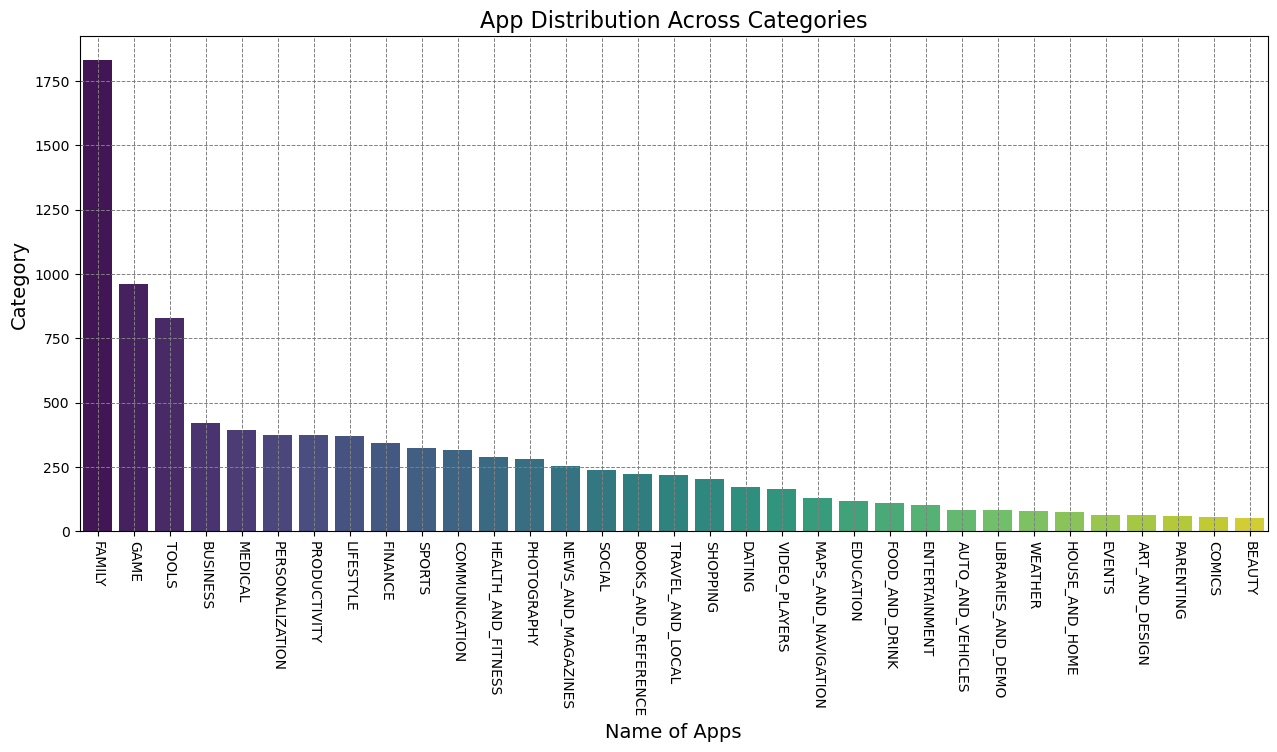

In [81]:
# Visualize category distribution
plt.figure(figsize=(13,6))
sns.barplot(y=category_distribution.values, x=category_distribution.index, palette="viridis")
plt.title("App Distribution Across Categories", fontsize=16)
plt.xlabel("Name of Apps", fontsize=14)
plt.ylabel("Category", fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray', zorder=0)
plt.tight_layout()
plt.xticks(rotation=-90)
plt.show()

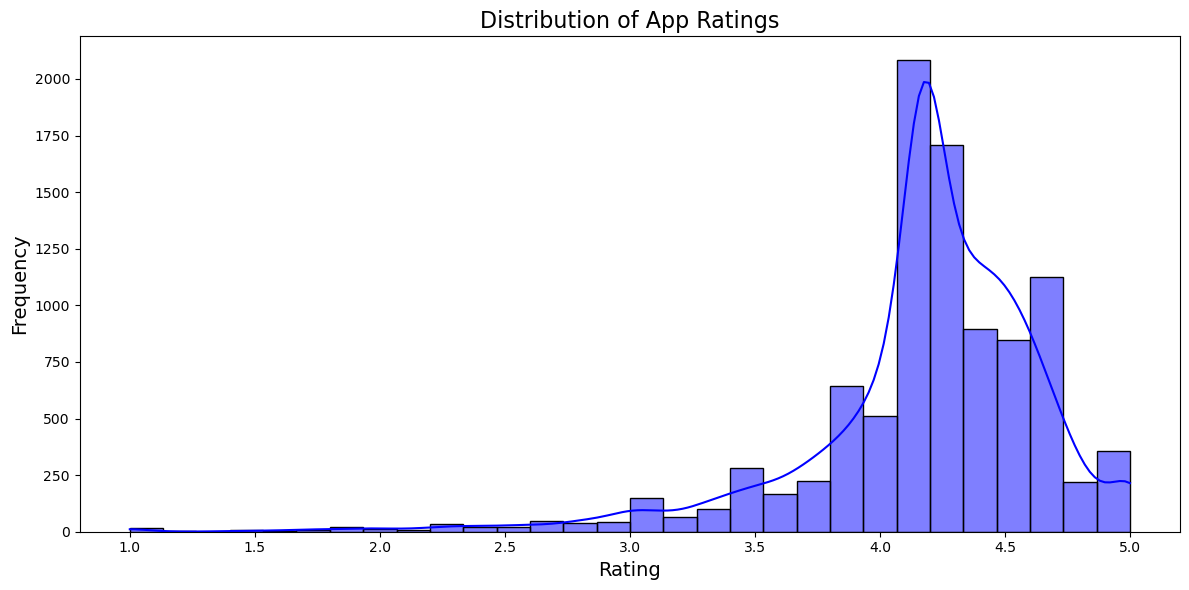

In [87]:
# Analyze metrics: ratings, size, popularity, and pricing
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='blue')
plt.title("Distribution of App Ratings", fontsize=16)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

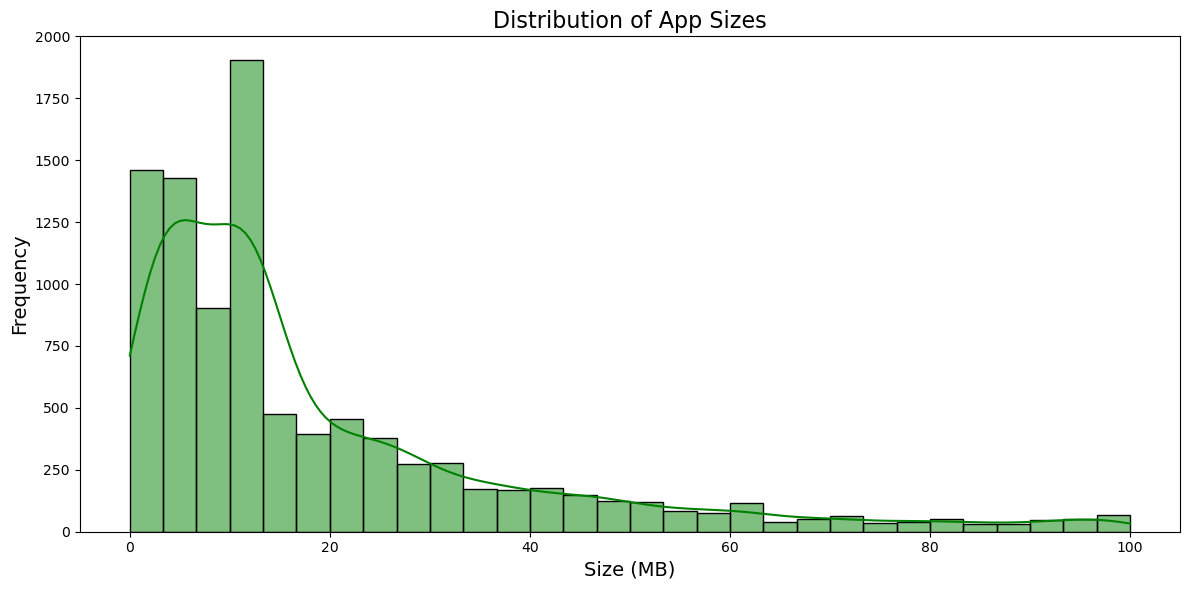

In [93]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Size'], bins=30, kde=True, color='green')
plt.title("Distribution of App Sizes", fontsize=16)
plt.xlabel("Size (MB)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

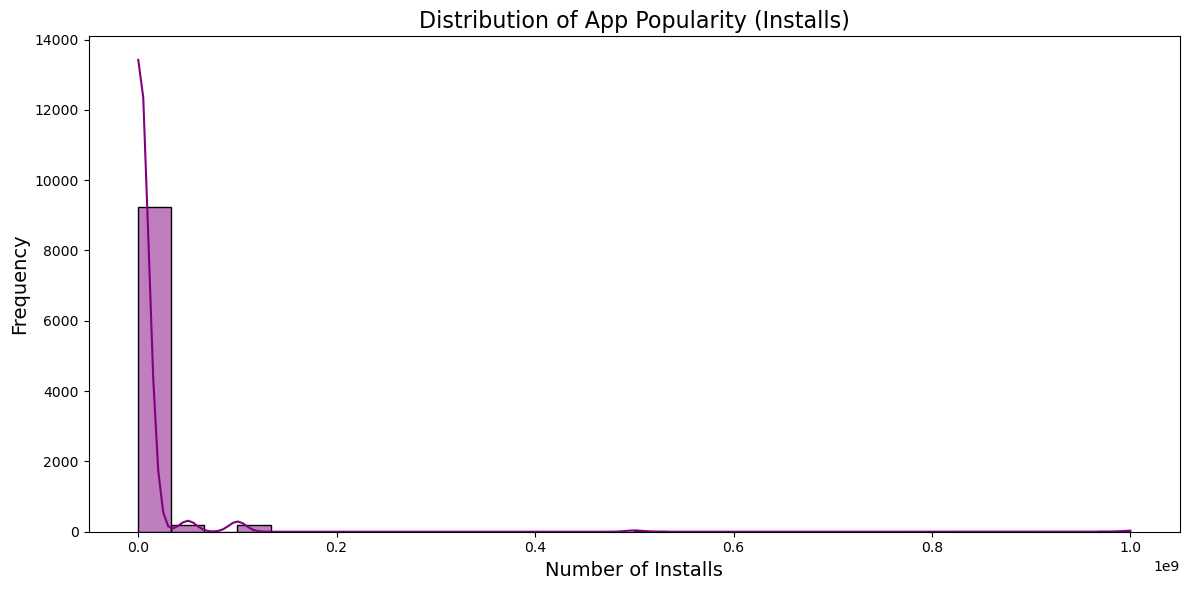

In [97]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='purple')
plt.title("Distribution of App Popularity (Installs)", fontsize=16)
plt.xlabel("Number of Installs", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

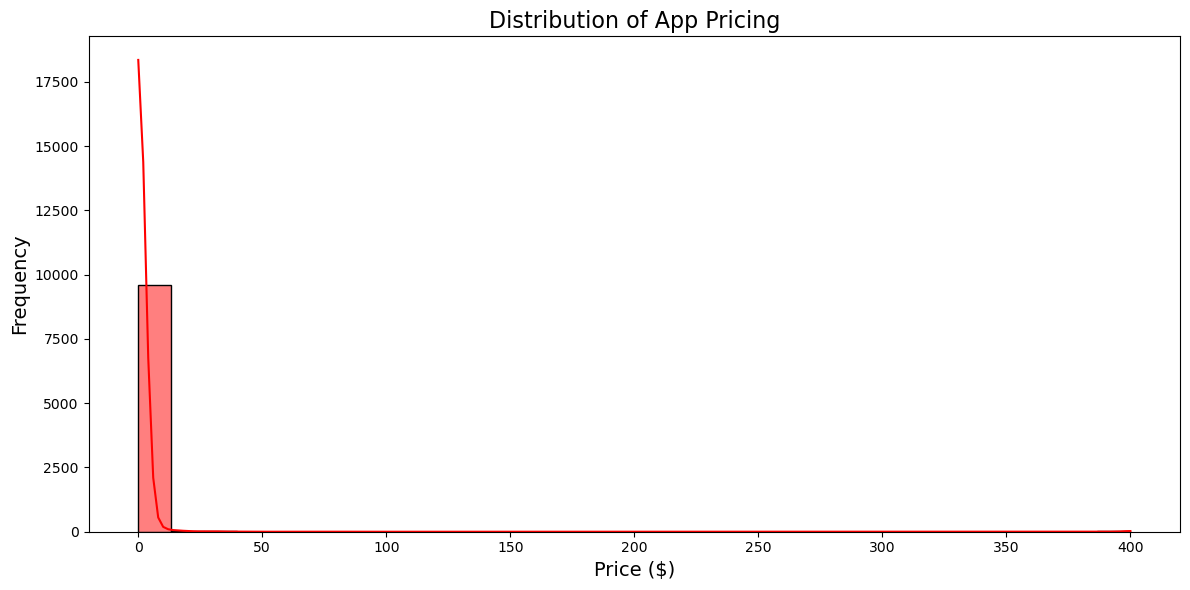

In [105]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='red')
plt.title("Distribution of App Pricing", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\anjal\AppData\Local\Temp\ipykernel_68128\3580253095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Price', data=df, palette="coolwarm",errorbar=None)


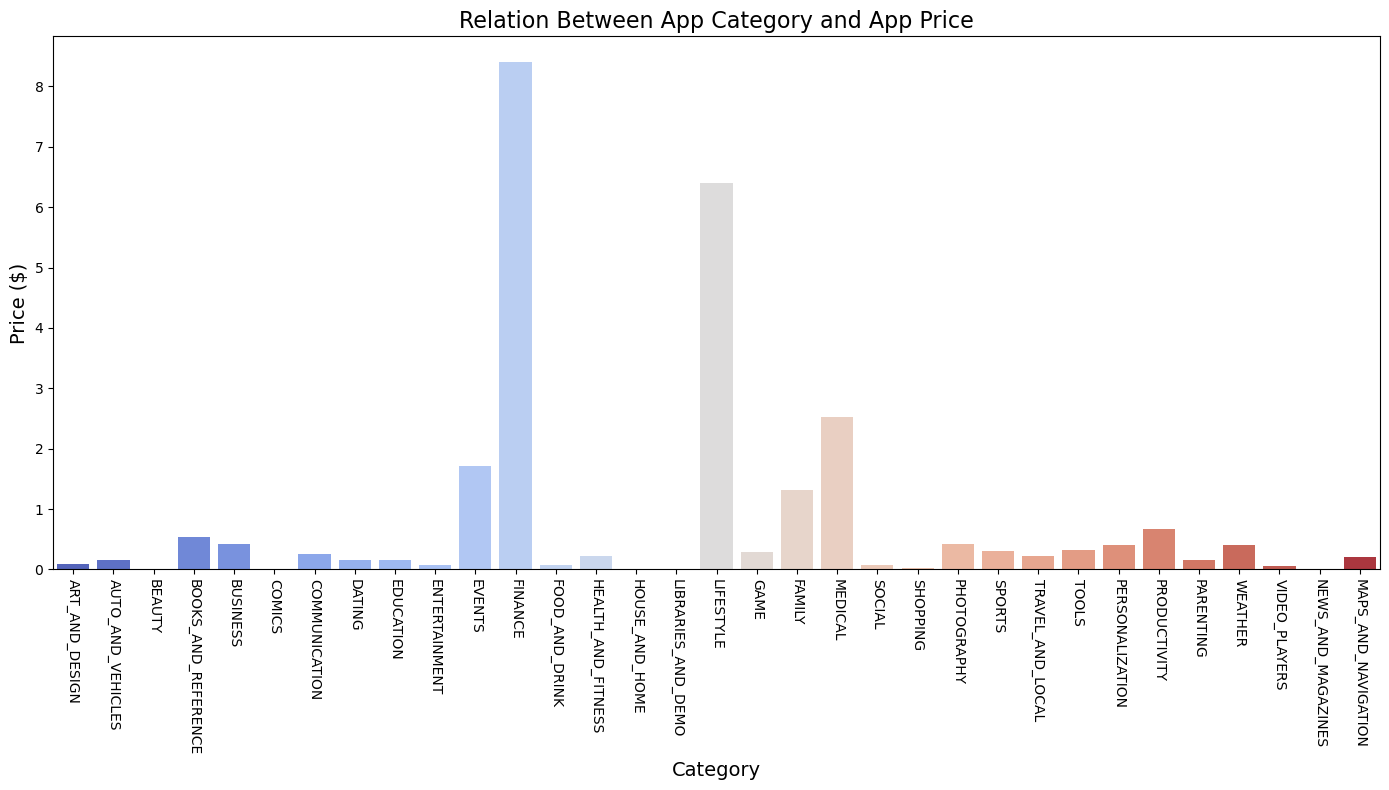

In [119]:
# Relation between app category and app price
plt.figure(figsize=(14, 8))
sns.barplot(x='Category', y='Price', data=df, palette="coolwarm",errorbar=None)
plt.title("Relation Between App Category and App Price", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.xticks(rotation=-90)
plt.tight_layout()plt.show()

In [185]:
# Count the number of free and paid apps in each category
type_counts = df.groupby(["Category", "Type"]).size().unstack(fill_value=0)

# Print summary
print("Number of Free and Paid Apps by Category:")
print(type_counts)


Number of Free and Paid Apps by Category:
Type                 Free  Paid
Category                       
ART_AND_DESIGN         61     3
AUTO_AND_VEHICLES      82     3
BEAUTY                 53     0
BOOKS_AND_REFERENCE   194    28
BUSINESS              408    12
COMICS                 56     0
COMMUNICATION         288    27
DATING                165     6
EDUCATION             115     4
ENTERTAINMENT         100     2
EVENTS                 63     1
FAMILY               1649   183
FINANCE               328    17
FOOD_AND_DRINK        110     2
GAME                  877    82
HEALTH_AND_FITNESS    273    15
HOUSE_AND_HOME         74     0
LIBRARIES_AND_DEMO     83     1
LIFESTYLE             350    19
MAPS_AND_NAVIGATION   126     5
MEDICAL               312    83
NEWS_AND_MAGAZINES    252     2
PARENTING              58     2
PERSONALIZATION       295    81
PHOTOGRAPHY           262    19
PRODUCTIVITY          346    28
SHOPPING              200     2
SOCIAL                236     

In [157]:
# Summarize the 'Type' column for free vs paid apps
df['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

C:\Users\anjal\AppData\Local\Temp\ipykernel_68128\499448428.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


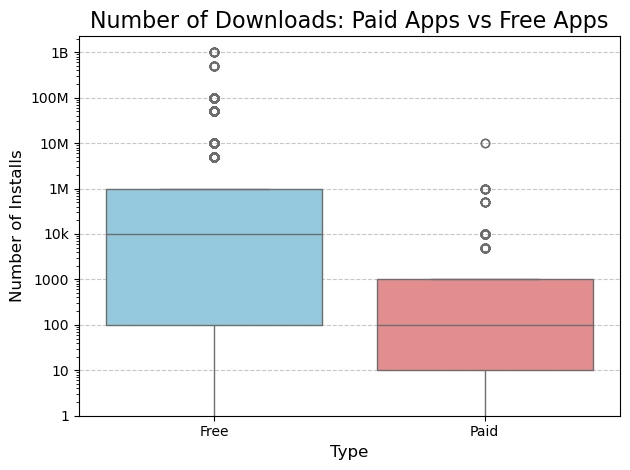

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter the data for free and paid apps
df['Type'] = df['Type'].astype('category')  # Ensure 'Type' is categorical

# Create a box plot using Seaborn
sns.boxplot(
    x='Type', 
    y='Installs', 
    data=df, 
    palette={'Paid': 'lightcoral', 'Free': 'skyblue'}
)

# Set a logarithmic scale for the y-axis
plt.yscale('log')

# Customize the y-axis ticks and labels to show 1M, 10M, 100M, etc.
ticks = [1e1, 1e2, 1e3, 1e4, 1e5,1e6, 1e7, 1e8, 1e9]  # Define tick positions
tick_labels = ['1', '10', '100', '1000','10k','1M','10M','100M','1B']  # Define tick labels
plt.yticks(ticks, tick_labels)

# Add titles and labels
plt.title('Number of Downloads: Paid Apps vs Free Apps', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Number of Installs', fontsize=12)

# Display the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: add grid lines
plt.tight_layout()
plt.show()

In [217]:
data=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\user_reviews.csv")
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [193]:
data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [195]:
data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [205]:
data['Translated_Review'] = data['Translated_Review'].fillna('Unknown')

In [211]:
data['Sentiment'] = data['Sentiment'].fillna('Unknown')

In [209]:
data['Sentiment_Polarity'] = data['Sentiment_Polarity'].fillna(data['Sentiment_Polarity'].mean())
data['Sentiment_Subjectivity'] = data['Sentiment_Subjectivity'].fillna(data['Sentiment_Subjectivity'].mean())

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

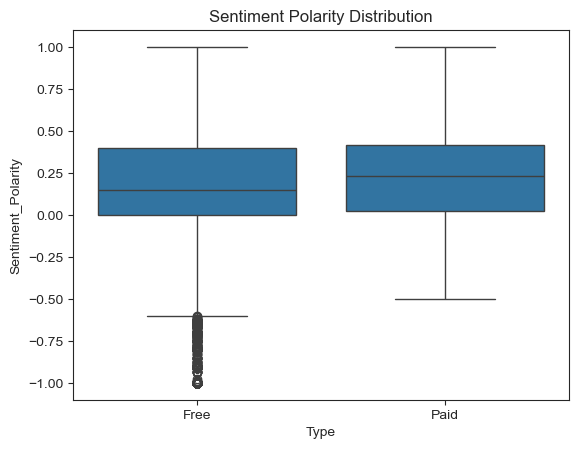

In [221]:
# Join and merge the two dataframe
merged_df = pd.merge(df, data, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')